## Dataset

**Dataset Structure:** The dataset is organized into three main directories—`train`, `test`, and `valid`—each containing subfolders for different tooth conditions (`Cavity`, `Implant`, `Fillings`, `Impacted Tooth`, and `Normal`).

- **Train:** Used for model training, containing a large number of segmented images across the various conditions.
- **Test:** Utilized for evaluating the model’s performance on unseen data.
- **Validation:** Helps in fine-tuning and validating the model during the training process.

**Directory Overview:**

- `test` (5 directories)
  - **Cavity:** 22 files
  - **Fillings:** 315 files
  - **Impacted Tooth:** 32 files
  - **Implant:** 104 files
  - **Normal:** 1,176 files
- `train` (5 directories)
  - **Cavity:** 576 files
  - **Fillings:** 5,242 files
  - **Impacted Tooth:** 428 files
  - **Implant:** 1,784 files
  - **Normal:** 17.1k files
- `valid` (5 directories)
  - **Cavity:** 43 files
  - **Fillings:** 540 files
  - **Impacted Tooth:** 38 files
  - **Implant:** 159 files
  - **Normal:** 2,032 files

**Key Features:**

- **🖼️ Segmented X-ray dataset:** Preprocessed with advanced techniques like contrast enhancement and masking.
- **📁 Well-organized:** Structured into directories for training, testing, and validation, each with subfolders for different dental conditions.
- **📏 Image Size:** Small, 64x64 pixels, designed to challenge and refine model performance.
- **⚡ Efficient:** Compact dataset size (~100 MB), making it quick to train, deploy, and run.

**Explore Further:** For the complete preprocessing pipeline and to explore the segmentation code, visit the GitHub repository or view the Kaggle notebook.

🔗 **Dataset Link:** [Dental Radiography Segmentation](https://www.kaggle.com/datasets/abbasseifossadat/dental-radiography-segmentation)

In [ ]:
# Let's store the location of our data in 3 variables that we can re use later

#train_data_dir = "tdurova/starsmiles/raw_data/Dental_Radiography/train"
#test_data_dir = "tdurova/starsmiles/raw_data/Dental_Radiography/test"
#valid_data_dir = "tdurova/starsmiles/raw_data/Dental_Radiography/valid"

train_data_dir = "/kaggle/input/dental-radiography-segmentation/Dental_Radiography/train"
test_data_dir = "/kaggle/input/dental-radiography-segmentation/Dental_Radiography/test"
valid_data_dir = "/kaggle/input/dental-radiography-segmentation/Dental_Radiography/valid"

In [ ]:
!ls
!ls /kaggle/input/dental-radiography-segmentation/
!ls /kaggle/input/dental-radiography-segmentation/Dental_Radiography/

### Dataset Integrity Tests with Assertions

Before loading the data, we run the following tests using assertions:

1. **Directory Check:** Ensure that the main `train`, `test`, and `valid` directories exist.
2. **Class Subdirectories:** Verify that each main directory contains the expected class folders (`Cavity`, `Fillings`, `Impacted Tooth`, `Implant`, `Normal`).
3. **File Presence:** Confirm that each class folder contains files, ensuring the dataset is populated.

These assertions ensure the dataset is correctly set up and ready for use.

In [ ]:
import os
from dotenv import load_dotenv
from pathlib import Path

# Load environment variables from .env file
load_dotenv()

def find_project_root(current_path, target_file):
    """
    Find the root directory of the project by looking for a specific file or directory.
    """
    current_path = Path(current_path).resolve()
    for parent in current_path.parents:
        if (parent / target_file).exists():
            return parent
    return current_path

# Determine the base directory of the project
base_dir = find_project_root(__file__ if '__file__' in globals() else Path().resolve(), '.env')

def get_data_dir(env_var, default_path):
    """
    Get the data directory path from environment variable and convert it to an absolute path.
    """
    data_dir = Path(os.getenv(env_var, default_path))
    return data_dir if data_dir.is_absolute() else (base_dir / data_dir).resolve()

# Determine data directories based on the environment
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    train_data_dir = Path("/kaggle/input/dental-radiography-segmentation/Dental_Radiography/train")
    test_data_dir = Path("/kaggle/input/dental-radiography-segmentation/Dental_Radiography/test")
    valid_data_dir = Path("/kaggle/input/dental-radiography-segmentation/Dental_Radiography/valid")
else:
    train_data_dir = get_data_dir('TRAIN_DATA_DIR', 'default_train_path')
    test_data_dir = get_data_dir('TEST_DATA_DIR', 'default_test_path')
    valid_data_dir = get_data_dir('VALID_DATA_DIR', 'default_valid_path')

# Check if the directories exist
assert train_data_dir.exists(), f"Training directory {train_data_dir} does not exist"
assert test_data_dir.exists(), f"Test directory {test_data_dir} does not exist"
assert valid_data_dir.exists(), f"Validation directory {valid_data_dir} does not exist"

print("All directories exist.")

In [ ]:
expected_classes = ['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

# Check for each expected class directory in the training, test, and validation directories
for class_name in expected_classes:
   assert os.path.exists(os.path.join(train_data_dir, class_name)), f"Class {class_name} not found in training directory"
   assert os.path.exists(os.path.join(test_data_dir, class_name)), f"Class {class_name} not found in test directory"
   assert os.path.exists(os.path.join(valid_data_dir, class_name)), f"Class {class_name} not found in validation directory"

print("All expected subdirectories exist in training, test, and validation directories.")

In [ ]:
def check_files_in_directory(directory):
    for class_name in expected_classes:
        class_dir = os.path.join(directory, class_name)
        assert len(os.listdir(class_dir)) > 0, f"No files found in {class_dir}"

# Check that there are files in each subdirectory
check_files_in_directory(train_data_dir)
check_files_in_directory(test_data_dir)
check_files_in_directory(valid_data_dir)

print("All directories contain files.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Updated path to match your dataset structure
img = load_img(f"{train_data_dir}/Cavity/0012_jpg.rf.4b11c696273493e2cbf801072ae9633a_segment_5368.png")
x = img_to_array(img) / 255  # We divide the pixel value by 255 to normalize between 0 and 1

In [ ]:
img

In [ ]:
x.shape

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

Here we didn't use any pooling layers which gave us a super high amount of parameters ...

### First model

This time WITH pooling layers

In [ ]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers

model = Sequential()

# Define the input shape explicitly using Input
model.add(Input(shape=(64, 64, 1)))

# Rescaling layer for grayscale images
model.add(layers.Rescaling(1./255))

# First Convolutional Block
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
model.add(layers.Flatten())

# Fully Connected Dense Layer
model.add(layers.Dense(64, activation="relu"))

# Dropout Layer for regularization
model.add(layers.Dropout(0.5))

# Output Layer with Softmax
model.add(layers.Dense(5, activation="softmax"))

In [ ]:
# With pooling layers with drastically reduced the amount of parameters from 165,286,113 to 504,033

In [ ]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])


In [ ]:
model.summary()

batch_size = 32

In [ ]:
Here, we'll create a `Tensorflow Datasets` object.
This will allow us to:


*   Grab images from our directory batch by batch, we won't load the FULL data at the same time
*   Reshape all the images to our desired input shape, 150x150 in this recap

We have to specify different things:


*   Where the data is located (that's why we saved the folder name in a variable)
*   The target size to resize our images so they fit our model
*   The Batch size
*   The "label mode", here we say binary, and the classes will be infered based on the folders name. It will chose cat = 0 and dog = 1
*   Here the labels are inferred based on the folder structure








In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the training data
train_ds = image_dataset_from_directory(
    train_data_dir,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the validation data
valid_ds = image_dataset_from_directory(
    valid_data_dir,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the test data
test_ds = image_dataset_from_directory(
    test_data_dir,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)


In [ ]:
class_names = train_ds.class_names
print(class_names)

In [ ]:
Here we'll create our callbacks. Those functions will be called at the end of every single epoch.
We'll use:


*   `ModelCheckpoint` to save the best version of our model after every epoch
*   `ReduceLROnPlateau` to reduce the `learning_rate` if the model doesn't get better after a few epochs
*   `EarlyStopping` to stop the training after a certain time if it's not improving


In [ ]:

MODEL = "model"

modelCheckpooint = callbacks.ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=1, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)


In [ ]:
train_ds

In [ ]:
%%time
history = model.fit(
        train_ds,
        epochs=30,
        validation_data=valid_ds,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


In [ ]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

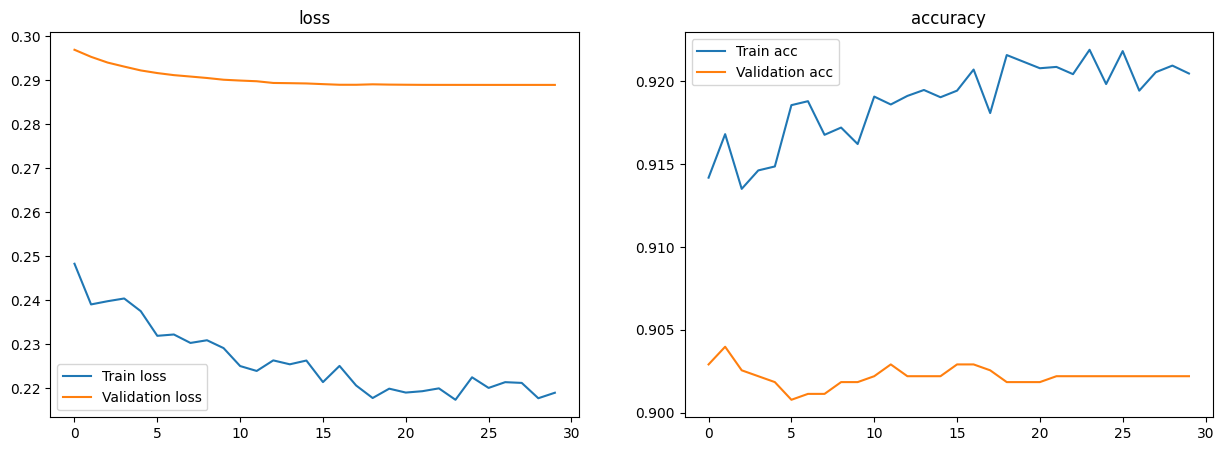

In [92]:
plot_history(history)

In [95]:
import os
from pathlib import Path
from datetime import datetime

def find_project_root(current_path, target_file):
    """
    Find the root directory of the project by looking for a specific file or directory.
    """
    current_path = Path(current_path).resolve()
    for parent in current_path.parents:
        if (parent / target_file).exists():
            return parent
    return current_path

# Determine the base directory of the project
base_dir = find_project_root(__file__ if '__file__' in globals() else Path().resolve(), '.env')

# Generate a unique filename using the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"model_{timestamp}.keras"

# Determine the model save path based on the environment
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    model_save_path = Path(f"/kaggle/working/models/{model_filename}")
else:
    # Save models generated during debugging in the notebooks/debug_models/ directory
    model_save_path = base_dir / f"notebooks/debug_models/{model_filename}"

# Ensure the directory exists
model_save_path.parent.mkdir(parents=True, exist_ok=True)

# Save the model
model.save(model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to /home/tdurova/code/tdurova/project-starsmiles/notebooks/debug_models/model_20240905_104243.keras
